In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

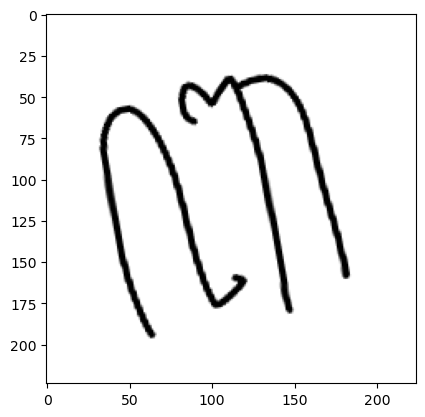

In [14]:
    import os
    import cv2
    import matplotlib.pyplot as plt

    Data = "C:/Users/USER/Project5/Dataset/train"
    Categories = ["ba", "ca", "da", "dha", "ga", "ha", "ja", "ka", "la", "ma", "na", "nga", "nya", "pa", "ra", "sa", "ta", "tha", "wa", "ya"]

    for CATEGORY in Categories:
        path = os.path.join(Data, CATEGORY)  # Fix the variable name here
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array, cmap="gray")
            plt.show()
            break
        break


In [15]:
print(img_array.shape)

(224, 224)


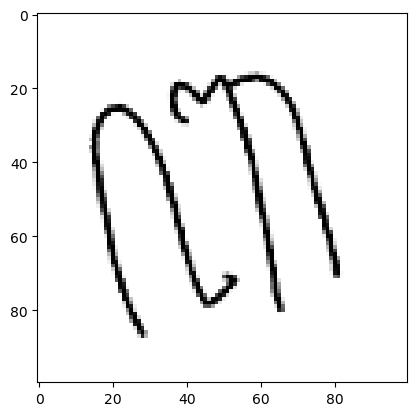

In [18]:
img_size = 100

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [21]:
training_data = []

def create_training_data():
    for CATEGORY in Categories:
        path = os.path.join(Data, CATEGORY)  # Fix the variable name here
        class_num = Categories.index(CATEGORY)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [22]:
print(len(training_data))

1758


In [24]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

10
8
11
0
4
2
13
1
12
17


In [26]:
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size, img_size, 1)

In [27]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [28]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [29]:
X[1]

array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]]], dtype=uint8)

Epoch 1/10
35/35 [==============================] - 6s 144ms/step - loss: 2.9348 - accuracy: 0.1861 - val_loss: 2.4005 - val_accuracy: 0.3089
Epoch 2/10
35/35 [==============================] - 5s 141ms/step - loss: 1.3529 - accuracy: 0.6125 - val_loss: 1.5026 - val_accuracy: 0.5366
Epoch 3/10
35/35 [==============================] - 5s 148ms/step - loss: 0.6042 - accuracy: 0.8211 - val_loss: 0.8780 - val_accuracy: 0.7073
Epoch 4/10
35/35 [==============================] - 5s 148ms/step - loss: 0.2580 - accuracy: 0.9259 - val_loss: 0.6684 - val_accuracy: 0.7317
Epoch 5/10
35/35 [==============================] - 5s 140ms/step - loss: 0.1072 - accuracy: 0.9738 - val_loss: 0.5420 - val_accuracy: 0.8293
Epoch 6/10
35/35 [==============================] - 5s 152ms/step - loss: 0.0361 - accuracy: 0.9955 - val_loss: 0.5345 - val_accuracy: 0.8293
Epoch 7/10
35/35 [==============================] - 5s 146ms/step - loss: 0.0198 - accuracy: 0.9982 - val_loss: 0.5782 - val_accuracy: 0.8537
Epoch 

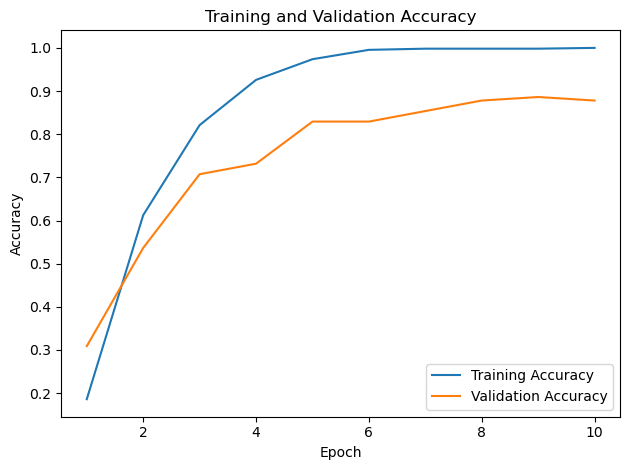

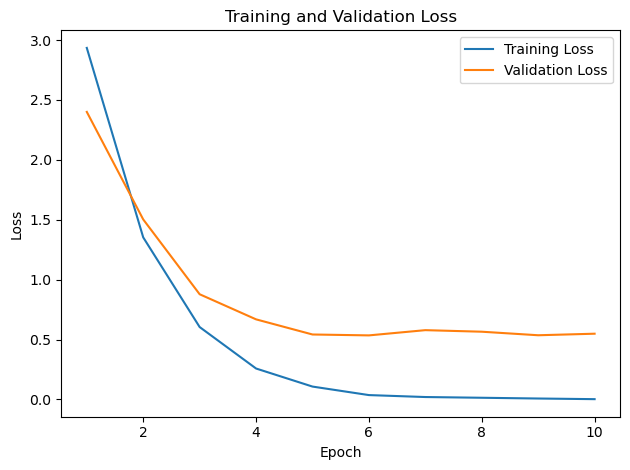

In [47]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Data = "C:/Users/USER/Project5/Dataset/train"
Categories = ["ba", "ca", "da", "dha", "ga", "ha", "ja", "ka", "la", "ma", "na", "nga", "nya", "pa", "ra", "sa", "ta", "tha", "wa", "ya"]

img_size = 100

# Function to create training data
def create_training_data():
    training_data = []
    for CATEGORY in Categories:
        path = os.path.join(Data, CATEGORY)
        class_num = Categories.index(CATEGORY)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    random.shuffle(training_data)
    return training_data

training_data = create_training_data()

x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)

# Normalize and one-hot encode the labels
x = x / 255.0
y = to_categorical(y, num_classes=len(Categories))

# Split the data into training and testing sets (70% training, 30% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Split the training data into training and validation sets (60% training, 10% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

# Change the output layer to match the number of classes
model.add(Dense(len(Categories)))
model.add(Activation("softmax"))  # Use softmax activation for multiclass classification

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

# Get the number of epochs
num_epochs = len(history.history['accuracy'])

# Testing the model on test data
accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
print("Accuracy on test data:", accuracy)

# Classification Report on test data
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
class_names = Categories

classification_report_result = classification_report(y_true_labels, y_pred_labels, target_names=class_names)
print(classification_report_result)

# Plot accuracy and loss
# plt.figure(figsize=(12, 6))

# Plot accuracy
# plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Plot loss
# plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
